<img src="./fig/questioning.png"  height="500" width="500">


# SOME TITLE

# Goal:
Analyze XXX dataset with the goal of...


## Dataset:
Data of XXX from YYY database.

Download routine:

.../python.exe some_path/some_file.py -some_parameter -some_other_parameter


Double-click __here__ for more info about the author.

<!-- Your info are below:

Fabrizio Ruffini
https://www.linkedin.com/in/fabrizio-ruffini-31a2902b/
Have a nice day!

-->

In [41]:
# import interesting packages

import os
import pytz
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from datetime import timedelta, datetime

from matplotlib import pyplot as plt
%matplotlib inline

In [82]:
from sklearn.model_selection import train_test_split # to split datasets
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algorithm
from sklearn.gaussian_process import GaussianProcessClassifier  #for using GaussianProcessClassifier Algorithm
from sklearn.gaussian_process.kernels import RBF                #for using GaussianProcessClassifier Algorithm
from sklearn import metrics #for checking the model accuracy


In [43]:
import seaborn as sns
sns.__version__

'0.9.0'

In [3]:
# import plotly (for interactive plots)
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode()

import chart_studio.plotly as py
#import plotly.plotly as py   <- older plotly version
import plotly.graph_objs as go

plotly_config = {'showLink': False, 'displaylogo': False, 'modeBarButtonsToRemove': ['sendDataToCloud']}



plotly.__version__

ModuleNotFoundError: No module named 'plotly'

In [10]:
## import GLUE (for interactive data analysis)
import glue
from glue import qglue
print("glue.__version__ = ", glue.__version__)

ModuleNotFoundError: No module named 'glue'

## DAQ

In [44]:
#define input and output main directories

outdir = r"./Data/output/"
if not os.path.exists(outdir): os.makedirs(outdir)

In [46]:
indir = "./Data/input/"
filename = "iris_data.csv" 

infile = os.path.normpath(indir + "{}".format(filename))

df_csv_raw = pd.read_csv(infile) #, parse_dates =[11,13], infer_datetime_format  =True, dayfirst =True)

#similar imports
#df_hdf_raw = pd.read_hdf(infile)
#df_hdf_raw = pd.read_excel(infile)

df_csv_raw.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [47]:
# import from archive dataset in sklearn
from sklearn.datasets import load_iris
iris = load_iris()
#iris
df_sklearn = pd.DataFrame(iris.data, columns = iris.feature_names)
df_sklearn["class"] = iris.target
#class 0 ='Iris-setosa', 
#class 1 ='Iris-versicolor',
#class 2 ='Iris-virginica'
print(df_sklearn.head(2))
# enconding: from 0,1,2 to strings
df_sklearn["class"] = df_sklearn["class"].astype('category')

cleanup_nums = {
                "class": {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica" }}
#To convert the columns to numbers using replace :
df_sklearn.replace(cleanup_nums, inplace=True)
df_sklearn.head(2)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   

   class  
0      0  
1      0  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [48]:
example_csv = 1

if example_csv:
    df_raw = df_csv_raw.copy();

## Data exploration

In [49]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
class                150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [50]:
df_raw.describe(include="all")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


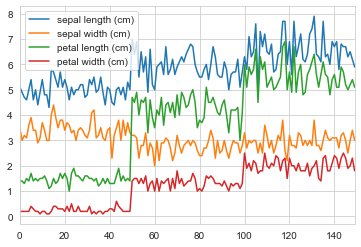

In [51]:
df_raw.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE9A224288>,
      dtype=object)

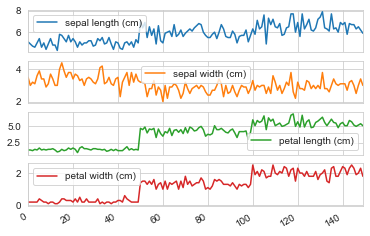

In [52]:
df_raw.plot(subplots=True)

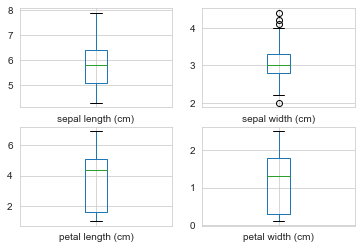

In [53]:
# box and whisker plots
df_raw.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

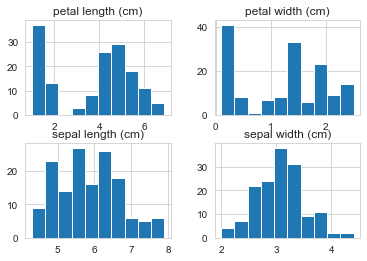

In [54]:
# histograms
df_raw.hist()
plt.show()

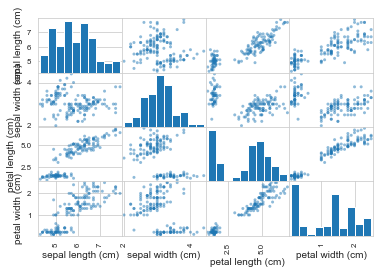

In [55]:
# scatter plot matrix
scatter_matrix(df_raw)
plt.show()

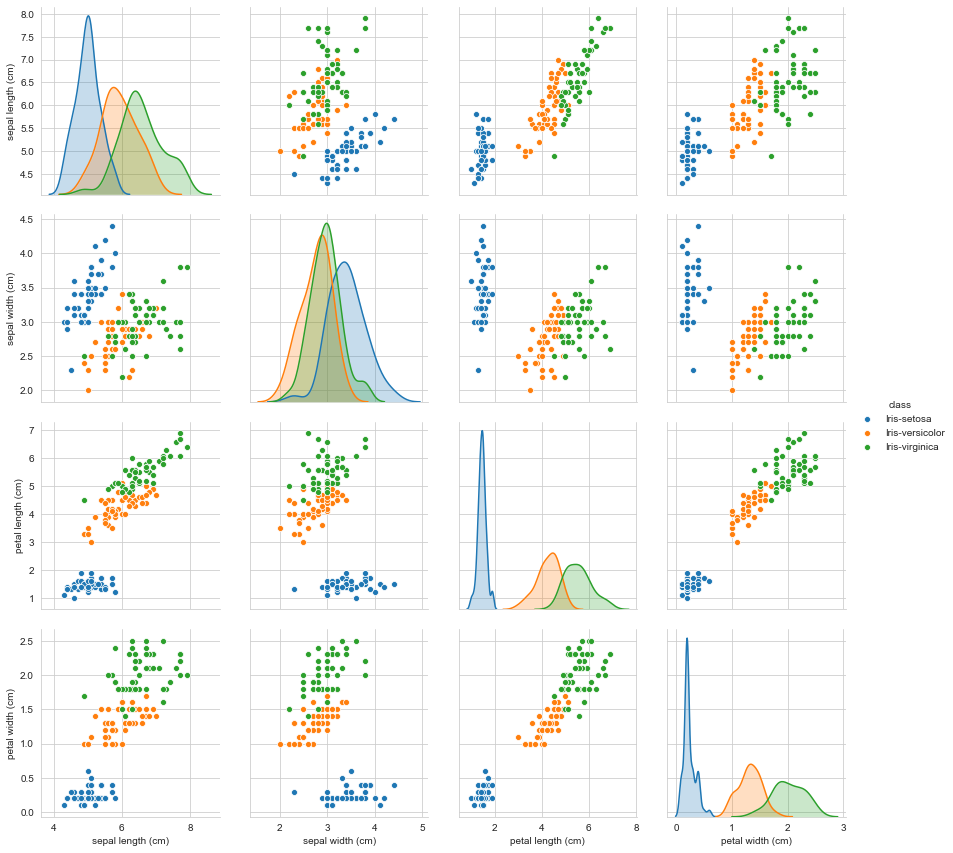

In [56]:
# some seaborn fancy plots (more time consuming)
sns.set_style("whitegrid")
sns.pairplot(df_raw,hue="class",height=3);
plt.show()

In [57]:
## glueviz coudl help you in itneractively find correlation between variables
app = qglue(data_raw=df_raw.reset_index())

NameError: name 'qglue' is not defined

## Preprocessing

In [58]:
#checks out how many null info are on the dataset
df_raw.isnull().sum() 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [59]:
# remove nans, if any
df_clean = df_raw.dropna().copy()
df_clean.isnull().sum() #checks out (now) how many null info are on the dataset

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

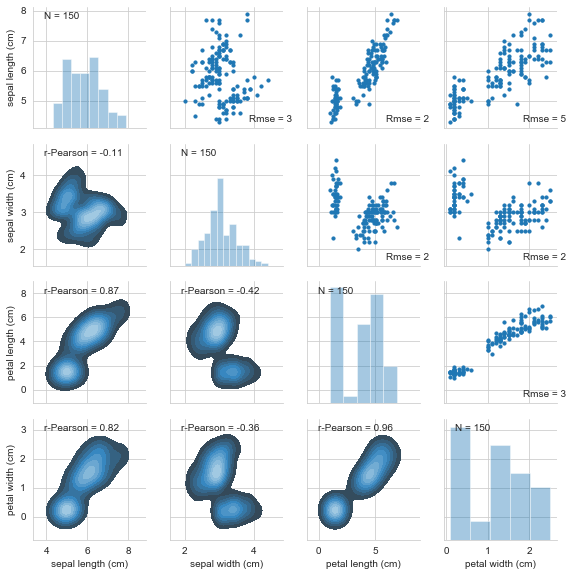

In [60]:
from scipy import stats
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r-Pearson = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

# ----------------------------------------------------------------------------------------------------------------------


def rmsefunc(x, y,**kws):
    rmse = np.sqrt(np.nanmean((y-x)**2))
    ax = plt.gca()
    ax.annotate("Rmse = {:.0f}".format(rmse),
                xy=(.7, .05), xycoords=ax.transAxes)


# ----------------------------------------------------------------------------------------------------------------------


def countfunc(x, **kws):
    ntot = np.nansum(x)
    #print(ntot)
    #print(len(x))
    #print(type(x))
    ax = plt.gca()
    ax.annotate("Count = {:.0f}".format(ntot),
                xy=(.1, .9), xycoords=ax.transAxes)

# ----------------------------------------------------------------------------------------------------------------------

def count_non_zero_func(x, **kws):
    ntot = np.count_nonzero(~np.isnan(x))
    #print(ntot)
    ax = plt.gca()
    ax.annotate("N = {:.0f}".format(ntot),
                xy=(.1, .9), xycoords=ax.transAxes)



g = sns.PairGrid(df_clean, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_upper(rmsefunc)
g.map_diag(sns.distplot, kde=False)
g.map_diag(count_non_zero_func)
g.map_lower(sns.kdeplot, shade=True, cmap="Blues_d", shade_lowest=False)
g.map_lower(corrfunc)
g.fig.set_size_inches(8,8)
plt.savefig("./fig/dataExplo_df_only_notnull_meas.png")

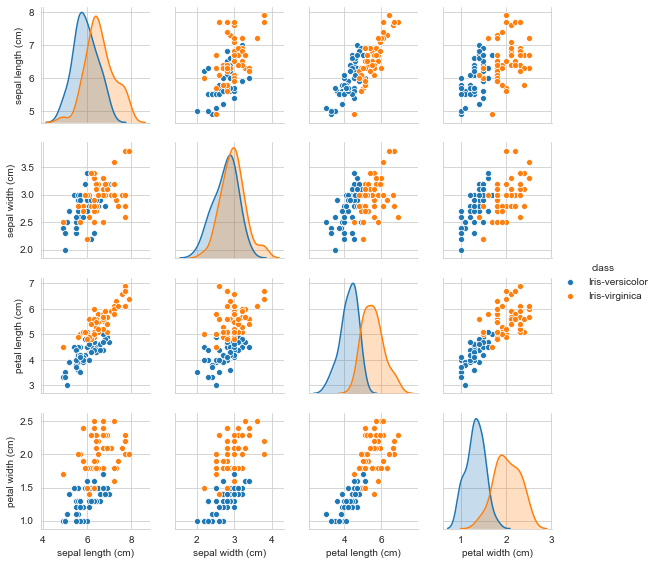

In [62]:
## cut data with petal_lenght_in_cm > 2 (cutting all iris_setosa)
df_cut = df_clean[df_clean["petal length (cm)"]>2]
sns.set_style("whitegrid")
sns.pairplot(df_cut,hue="class",height=2);
#plt.show()
plt.savefig("./fig/dataExplo_df_cut.png")

In [76]:
#Splitting The Data into Training And Testing Dataset
train, test = train_test_split(df_cut, test_size = 0.3)
train_X = train[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]# taking the training data features
train_y=train["class"] #output of our training data
test_X= test[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] # taking test data features
test_y =test["class"]   #output value of test data


In [77]:
test_y.head(2)

145    Iris-virginica
114    Iris-virginica
Name: class, dtype: object

## Processing

In [93]:
df_results = df_cut.copy()   #make a copy not to do misalignements

In [78]:
#testing Tree Classifier
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9333333333333333


In [79]:
#testing KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9666666666666667


In [88]:
#testing GaussianProcessClassifier

kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(train_X,train_y)

prediction=gpc_rbf_isotropic.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))



The accuracy of the Logistic Regression is 0.9333333333333333


## Results: Saving out

In [97]:
out_filename = "some_results.csv"
outdir = "./Data/output/"
outfile = os.path.normpath(outdir + "{}".format(out_filename))

df_results.to_csv("{}".format(outfile))


# END

## fancy examples


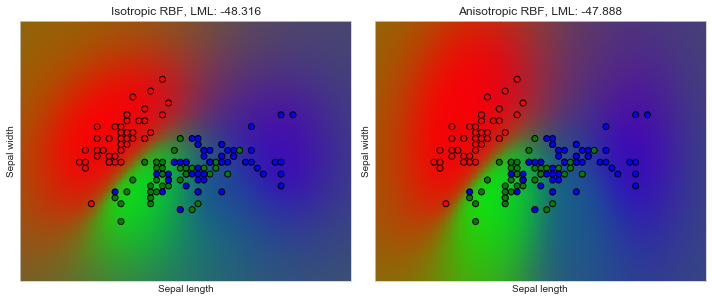

In [89]:
# example GaussianProcessClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = np.array(iris.target, dtype=int)

h = .02  # step size in the mesh

kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y],
                edgecolors=(0, 0, 0))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("%s, LML: %.3f" %
              (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta)))

plt.tight_layout()
plt.show()